In [10]:
trec_to_learn = 7
random_seed = 42

In [11]:
import receive_data

In [3]:
doc_ranks, queries, query_characteristics = receive_data.loadData(trec_to_learn)

Query :  351
Query :  352
Query :  353
Query :  354
Query :  355
Query :  356
Query :  357
Query :  358
Query :  359
Query :  360
Query :  361
Query :  362
Query :  363
Query :  364
Query :  365
Query :  366
Query :  367
Query :  368
Query :  369
Query :  370
Query :  371
Query :  372
Query :  373
Query :  374
Query :  375
Query :  376
Query :  377
Query :  378
Query :  379
Query :  380
Query :  381
Query :  382
Query :  383
Query :  384
Query :  385
Query :  386
Query :  387
Query :  388
Query :  389
Query :  390
Query :  391
Query :  392
Query :  393
Query :  394
Query :  395
Query :  396
Query :  397
Query :  398
Query :  399
Query :  400


In [12]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
CUR_DIR = os.path.dirname(os.path.abspath("./")) + "/"

sys.path.append(CUR_DIR + 'genetic_algorithm')
import create_population
import learn_population

In [13]:
import primitive
import numpy as np

from get_quality import get_quality
from copy import deepcopy
from mutation import mutate_rand_tree
from crossover import crossfit
from create_population import create_random_model
from primitive import Primitives

In [14]:
def vis(population, vals):
    plt.figure(figsize=(10, 5))
    plt.scatter(vals, [pop.get_tokens() for pop in population])
    plt.show()
    print ("!")

In [15]:
def rank_population(population, doc_ranks, queries, query_characteristics):   

    qualities = []
    for model in population:
        quality = get_quality(model, doc_ranks, queries, query_characteristics)
        qualities.append(quality)

    return qualities

In [16]:
from tqdm import tqdm_notebook as tqdm

In [ ]:
np.random.seed(random_seed)

size = 40

population = create_population.create_population(size, 5)

history = []

for iteration in tqdm(range(100)):
    new_population = []

    sz = len(population)
    print (sz)

    new_population.append(population[0])

    for i in range(sz // 30):
        new_population.append(mutate_rand_tree(population[0]))
        new_population.append(mutate_rand_tree(population[1]))
        new_population.append(mutate_rand_tree(population[2]))
    for i in range(sz // 10):
        new_population.append(create_random_model(4))
    for i in range(sz):
        t1 = population[np.random.randint(0, sz / 2)]
        t2 = population[np.random.randint(0, sz / 2)]
        new_population.append(mutate_rand_tree(crossfit(t1, t2)))

    population = np.array(list(population) + list(new_population))
    values = rank_population(population, doc_ranks, queries, query_characteristics)
    values = np.array(values)

    indexes = np.arange(len(population))
    indexes = sorted(indexes, key=lambda i: -values[i] + population[i].get_tokens() / 1000.)

    population = (population[indexes])[:size]
    values = (values[indexes])[:size]

    vis(population, values)
    history.append((population, values))

    print(-values[0])

/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:65: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:73: RuntimeWarning: invalid value encountered in double_scalars
  vars = np.array([fr.low * sc.low, fr.low * sc.high, fr.high * sc.low, fr.high * sc.high])


HBox(children=(IntProgress(value=0), HTML(value='')))

39



Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python3.5/threading.py", line 914, in _bootstrap_inner
    self.run()
  File "/home/howl/coding/article/venv/lib/python3.5/site-packages/tqdm/_monitor.py", line 62, in run
    for instance in self.tqdm_cls._instances:
  File "/home/howl/coding/article/venv/lib/python3.5/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: overflow encountered in exp
  return self.func(*[node.calc(x, y) for node in self.nodes])


In [9]:
import dill
import pickle
import matplotlib.cm as cm

In [10]:
def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [11]:
save_object(history, "hist" + str(tre))

In [12]:
saved_hist = pickle.load(open("hist7.1"))


In [68]:
import matplotlib
font = {'family' : 'normal',
        #'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

76


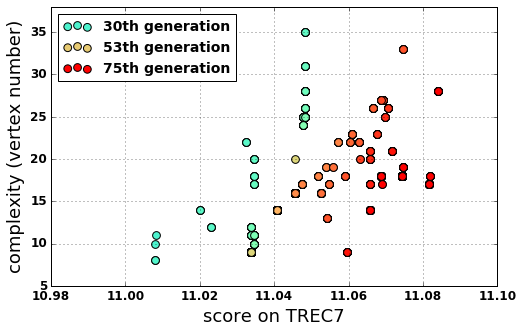

In [70]:
print (len(saved_hist))
plt.figure(figsize=(8, 5))

colors = cm.rainbow(np.linspace(0, 1, 76))

L = 30
R = 76
s = 60

for i in range(L, R):
    if i == L:
        plt.scatter(saved_hist[i][1], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str(L) + 'th generation')
    elif i == (L + R) / 2:
        plt.scatter(saved_hist[i][1], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str((L + R) / 2) + 'th generation')
    elif i == R - 1:
        plt.scatter(saved_hist[i][1], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str(R - 1) + 'th generation')
    else:
        plt.scatter(saved_hist[i][1], [p.get_tokens() for p in saved_hist[i][0]], c=colors[i], s=s)
    
        
plt.ylabel("complexity (vertex number)", size=18)
plt.xlabel("score on TREC7", size=18)
plt.grid()
plt.ylim((5, 38))
plt.legend(loc='upper left', fontsize=14)
#plt.vlines(11.04, 5, 35)
plt.show()

In [71]:
doc_ranks, queries, query_characteristics = receive_data.loadData(6)

('Query : ', 301)
('Query : ', 302)
('Query : ', 303)
('Query : ', 304)
('Query : ', 305)
('Query : ', 306)
('Query : ', 307)
('Query : ', 308)
('Query : ', 309)
('Query : ', 310)
('Query : ', 311)
('Query : ', 312)
('Query : ', 313)
('Query : ', 314)
('Query : ', 315)
('Query : ', 316)
('Query : ', 317)
('Query : ', 319)
('Query : ', 320)
('Query : ', 321)
('Query : ', 322)
('Query : ', 323)
('Query : ', 324)
('Query : ', 325)
('Query : ', 326)
('Query : ', 327)
('Query : ', 328)
('Query : ', 329)
('Query : ', 330)
('Query : ', 331)
('Query : ', 332)
('Query : ', 333)
('Query : ', 334)
('Query : ', 335)
('Query : ', 336)
('Query : ', 337)
('Query : ', 338)
('Query : ', 339)
('Query : ', 340)
('Query : ', 341)
('Query : ', 342)
('Query : ', 343)
('Query : ', 344)
('Query : ', 345)
('Query : ', 346)
('Query : ', 347)
('Query : ', 348)
('Query : ', 349)
('Query : ', 350)


In [74]:
vals6 = []
for pop in tqdm(saved_hist):
    vals6.append(rank_population(pop[0], doc_ranks, queries, query_characteristics))

HBox(children=(IntProgress(value=0, max=76), HTML(value=u'')))

/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: invalid value encountered in sqrt
  return self.func(*[node.calc(x, y) for node in self.nodes])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:41: RuntimeWarning: overflow encountered in exp
  return self.func(*[node.calc(x, y) for node in self.nodes])
/home/howl/coding/article/Information-retrieval/genetic_algorithm/primitive.py:160: RuntimeWarning: invalid value encountered in log10
  LOG = Primitive(lambda x: np.log10(1+x), 1, DOMAINS.POSITIVE, DOMAINS.REAL, 'log')


In [94]:
save_object(vals6, "score76_seed42")

76


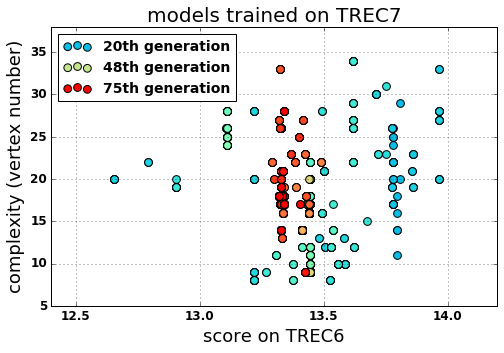

In [80]:
print (len(saved_hist))
plt.figure(figsize=(8, 5))

colors = cm.rainbow(np.linspace(0, 1, 76))

L = 20
R = 76
s = 60

for i in range(L, R):
    if i == L:
        plt.scatter(vals6[i], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str(L) + 'th generation')
    elif i == (L + R) / 2:
        plt.scatter(vals6[i], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str((L + R) / 2) + 'th generation')
    elif i == R - 1:
        plt.scatter(vals6[i], [p.get_tokens() for p in saved_hist[i][0]], \
                    c=colors[i], s=s, label=str(R - 1) + 'th generation')
    else:
        plt.scatter(vals6[i], [p.get_tokens() for p in saved_hist[i][0]], c=colors[i], s=s)
    
plt.title("models trained on TREC7", size=20)
plt.ylabel("complexity (vertex number)", size=18)
plt.xlabel("score on TREC6", size=18)
plt.grid()
plt.ylim((5, 38))
plt.legend(loc='upper left', fontsize=14)
#plt.vlines(11.04, 5, 35)
plt.show()

76


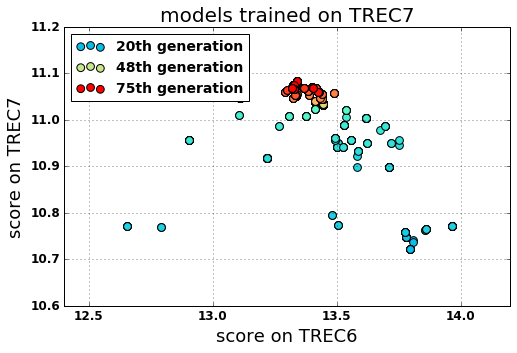

In [83]:
print (len(saved_hist))
plt.figure(figsize=(8, 5))

colors = cm.rainbow(np.linspace(0, 1, 76))

L = 20
R = 76
s = 60

for i in range(L, R):
    if i == L:
        plt.scatter(vals6[i], saved_hist[i][1], \
                    c=colors[i], s=s, label=str(L) + 'th generation')
    elif i == (L + R) / 2:
        plt.scatter(vals6[i], saved_hist[i][1], \
                    c=colors[i], s=s, label=str((L + R) / 2) + 'th generation')
    elif i == R - 1:
        plt.scatter(vals6[i], saved_hist[i][1], \
                    c=colors[i], s=s, label=str(R - 1) + 'th generation')
    else:
        plt.scatter(vals6[i], saved_hist[i][1], c=colors[i], s=s)
    
plt.title("models trained on TREC7", size=20)
plt.ylabel("score on TREC7", size=18)
plt.xlabel("score on TREC6", size=18)
plt.grid()
#plt.ylim((5, 38))
plt.legend(loc='upper left', fontsize=14)
#plt.vlines(11.04, 5, 35)
plt.show()

In [92]:
from primitive import Primitive
#from Levenshtein import distance as leven_dist

# consts for hashing
P = 10003
MOD = int(1e9 + 7)


def check_commutativity(primitive):
    if primitive.str in ["add", "multiply"]:
        if hash(primitive.nodes[0]) > hash(primitive.nodes[0]):
            primitive.nodes = primitive.nodes[::-1]


def list_nodes_with_hashes(primitive):
    ans = []
    hash_ = hash(primitive.str) % MOD

    check_commutativity(primitive)

    for node in primitive.nodes:
        list_nodes = list_nodes_with_hashes(node)
        hash_ *= P
        hash_ += list_nodes[-1][1]
        hash_ %= MOD
        ans += list_nodes

    ans.append((primitive, hash_))
    
    return ans


def compare(p1, p2):
    if p1.str != p2.str:
        return False

    check_commutativity(p1)
    check_commutativity(p2) 

    for l, r in zip(p1.nodes, p2.nodes):
        if not compare(l, r):
            return False

    return True


def get_first_structural_distance(p1, p2):

    nodes1 = list_nodes_with_hashes(p1)
    nodes2 = list_nodes_with_hashes(p2)
    
    max_same_part = 0
    
    for n1 in nodes1:
        for n2 in nodes2:
            if n1[1] == n2[1] and compare(n1[0], n2[0]):
                max_same_part = max(max_same_part, n1[0].get_tokens())

    return p1.get_tokens() + p2.get_tokens() - 2 * max_same_part


def get_second_structural_distance(p1, p2):
    w1 = p1.get_str_representation()
    w2 = p2.get_str_representation()
    #return leven_dist(w1, w2)


76


HBox(children=(IntProgress(value=0, max=56), HTML(value=u'')))

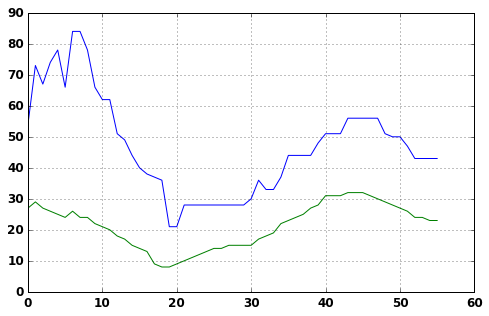

In [93]:
print (len(saved_hist))
plt.figure(figsize=(8, 5))

colors = cm.rainbow(np.linspace(0, 1, 76))

L = 20
R = 76
s = 60

dists = []
for i in tqdm(range(L, R)):
    dist = []
    for tr1 in saved_hist[i][0]:
        for tr2 in saved_hist[i][0]:
            dist.append(get_first_structural_distance(tr1, tr2))
    dists.append(dist)
    
plt.plot([max(dist) for dist in dists])
plt.plot([sum(dist) / len(dist) for dist in dists])
    
plt.grid()
plt.show()

76


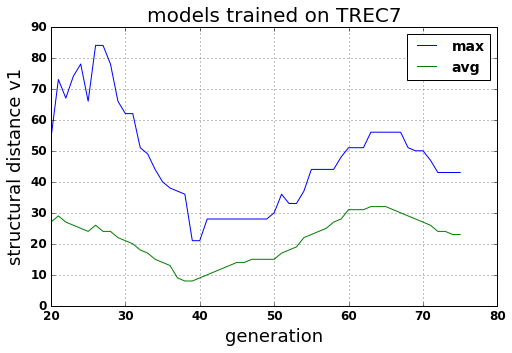

In [99]:
print (len(saved_hist))
plt.figure(figsize=(8, 5))

colors = cm.rainbow(np.linspace(0, 1, 76))

L = 20
R = 76
s = 60
    
plt.plot(range(L, R), [max(dist) for dist in dists], label="max")
plt.plot(range(L, R), [sum(dist) / len(dist) for dist in dists], label="avg")

plt.title("models trained on TREC7", size=20)
plt.ylabel("structural distance v1", size=18)
plt.xlabel("generation", size=18)
plt.grid()
#plt.ylim((5, 38))
plt.legend(loc='upper right', fontsize=14)
#plt.vlines(11.04, 5, 35)

plt.show()


In [100]:
! python --version


Python 2.7.12


In [ ]:
print (len(saved_hist))
plt.figure(figsize=(15, 10))
for (pop, val) in saved_hist:#[14:40]:
    plt.scatter(val, [p.get_tokens() for p in pop])
plt.grid()
#for i in range(10):
#    plt.plot([0, 14], [])
plt.show()

In [26]:
for i, (val, pop) in enumerate(zip(values, population)):
    print (i, val, pop, end="\n" * 4)

0 13.9469004007 log(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(divide(tf, idf), exp(tf)), substract(Sqrt(tf), idf)), exp(tf)), exp(tf)), exp(idf))), exp(tf)), substract(substract(idf, tf), substract(divide(idf, divide(exp(idf), add(add(multiply(idf, substract(tf, tf)), add(exp(tf), Sqrt(substract(substract(divide(log(add(idf, tf)), idf), idf), exp(tf))))), divide(substract(substract(substract(substract(divide(log(add(idf, tf)), idf), idf), log(divide(idf, exp(tf)))), idf), exp(tf)), exp(idf))))), idf))), exp(idf)), idf), exp(idf))))



1 13.9421155109 log(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(add(add(divide(tf, idf), log(Sqrt(tf))), divide(substract(substract(substract(divide(divide(tf, idf), exp(tf)), substract(substract(exp(idf), idf), idf)), exp(tf)), exp(tf)), exp(idf))), exp(tf)), substract(substract(idf, tf),

In [27]:
population[28].print_as_tree()

 log
 | divide
 | | substract
 | | | substract
 | | | | divide
 | | | | | log
 | | | | | | add
 | | | | | | | substract
 | | | | | | | | idf
 | | | | | | | | idf
 | | | | | | | tf
 | | | | | idf
 | | | | exp
 | | | | | tf
 | | | exp
 | | | | tf
 | | exp
 | | | idf


13.9103081593 log(divide(substract(substract(divide(log(add(substract(idf, idf), tf)), idf), exp(tf)), exp(tf)), exp(idf)))


$$ \text{log}(\frac{log(tf)}{idf} - 2 * exp(tf)) - idf$$

In [11]:
learn_population.learn_population(population, doc_ranks, queries, query_characteristics, vis)

10.8264
12.4228
6.6033
5.6938
10.1121
10.8245
9.4921


KeyboardInterrupt: 